In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam

In [2]:
data_dir= "P:\Wheat Disease Classification\Dataset"
data= tf.keras.preprocessing.image_dataset_from_directory(data_dir)

Found 5175 files belonging to 4 classes.


In [3]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.8, 1.2],
    channel_shift_range=10,
    validation_split=0.2  # Use for splitting the dataset into training and validation
)

# Only rescaling for validation
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)


In [4]:
batch_size=32
image_size=(150,150)

In [5]:
# Training data generator
train_data = train_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Set as training data
)

# Validation data generator
val_data= val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Set as validation data
)

Found 4133 images belonging to 4 classes.
Found 1289 images belonging to 4 classes.


In [6]:
labels = (train_data.class_indices)
labels = dict((v,k) for k,v in labels.items())
print(labels)

{0: 'Brown rust', 1: 'Healthy', 2: 'Loose Smut', 3: 'Yellow rust'}


In [7]:
def create_model(input_shape=(150, 150, 3), num_classes=4):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Second convolutional block
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Third convolutional block
    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Flatten and dense layers
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Create the model
model = create_model()


p:\Wheat Disease Classification\venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 148, 148, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 72, 72, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 34, 34, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     9,470,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,566,404 (36.49 MB)

 Trainable params: 9,565,444 (36.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Callback to stop when validation loss doesn't improve for 5 epochs
early_stop = EarlyStopping(
    monitor='val_loss',        # You can also use 'val_accuracy'
    patience=5,                # Wait 5 epochs before stopping
    restore_best_weights=True  # Load best weights after stopping
)

# Callback to save the best model
checkpoint = ModelCheckpoint(
    "best_wheat_model.h5",     # Filepath to save model
    monitor='val_accuracy',    # Metric to monitor
    save_best_only=True,       # Save only when val_accuracy improves
    mode='max',                # Looking for maximum accuracy
    verbose=1
)

# Train the model with callbacks
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // train_data.batch_size,
    validation_data=val_data,
    validation_steps=val_data.samples // val_data.batch_size,
    epochs=40,  # Max limit
    callbacks=[early_stop, checkpoint]
)

Epoch 1/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8015 - loss: 0.5601
Epoch 1: val_accuracy improved from None to 0.24219, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 169s 1s/step - accuracy: 0.8200 - loss: 0.5148 - val_accuracy: 0.2422 - val_loss: 17.9005
Epoch 2/40
  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:33 732ms/step - accuracy: 0.7500 - loss: 0.5663

p:\Wheat Disease Classification\venv\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()



Epoch 2: val_accuracy improved from 0.24219 to 0.24297, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.7500 - loss: 0.5663 - val_accuracy: 0.2430 - val_loss: 17.1477
Epoch 3/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 804ms/step - accuracy: 0.8539 - loss: 0.4026
Epoch 3: val_accuracy did not improve from 0.24297
129/129 ━━━━━━━━━━━━━━━━━━━━ 116s 899ms/step - accuracy: 0.8644 - loss: 0.3829 - val_accuracy: 0.2422 - val_loss: 7.7807
Epoch 4/40
  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:30 706ms/step - accuracy: 0.8438 - loss: 0.4831
Epoch 4: val_accuracy improved from 0.24297 to 0.24453, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.8438 - loss: 0.4831 - val_accuracy: 0.2445 - val_loss: 7.7147
Epoch 5/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.8650 - loss: 0.3782
Epoch 5: val_accuracy improved from 0.24453 to 0.28203, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 117s 909ms/step - accuracy: 0.8698 - loss: 0.3723 - val_accuracy: 0.2820 - val_loss: 5.3972
Epoch 6/40
  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:30 703ms/step - accuracy: 0.8438 - loss: 0.3932
Epoch 6: val_accuracy improved from 0.28203 to 0.28828, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 102ms/step - accuracy: 0.8438 - loss: 0.3932 - val_accuracy: 0.2883 - val_loss: 5.2100
Epoch 7/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 802ms/step - accuracy: 0.8926 - loss: 0.2987
Epoch 7: val_accuracy improved from 0.28828 to 0.55313, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 117s 906ms/step - accuracy: 0.8944 - loss: 0.3033 - val_accuracy: 0.5531 - val_loss: 2.7693
Epoch 8/40
  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:30 708ms/step - accuracy: 0.8750 - loss: 0.2821
Epoch 8: val_accuracy did not improve from 0.55313
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.8750 - loss: 0.2821 - val_accuracy: 0.5305 - val_loss: 2.9514
Epoch 9/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 800ms/step - accuracy: 0.9036 - loss: 0.2710
Epoch 9: val_accuracy improved from 0.55313 to 0.68047, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 117s 905ms/step - accuracy: 0.9042 - loss: 0.2777 - val_accuracy: 0.6805 - val_loss: 1.2348
Epoch 10/40
  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:31 717ms/step - accuracy: 1.0000 - loss: 0.0688
Epoch 10: val_accuracy improved from 0.68047 to 0.68516, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 1.0000 - loss: 0.0688 - val_accuracy: 0.6852 - val_loss: 1.2397
Epoch 11/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 818ms/step - accuracy: 0.9183 - loss: 0.2366
Epoch 11: val_accuracy did not improve from 0.68516
129/129 ━━━━━━━━━━━━━━━━━━━━ 118s 918ms/step - accuracy: 0.9139 - loss: 0.2438 - val_accuracy: 0.6352 - val_loss: 2.5297
Epoch 12/40
  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:32 725ms/step - accuracy: 0.9062 - loss: 0.1522
Epoch 12: val_accuracy did not improve from 0.68516
129/129 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.9062 - loss: 0.1522 - val_accuracy: 0.6203 - val_loss: 2.5887
Epoch 13/40
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 806ms/step - accuracy: 0.9196 - loss: 0.2210
Epoch 13: val_accuracy improved from 0.68516 to 0.68984, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 118s 912ms/step - accuracy: 0.9220 - loss: 0.2273 - val_accuracy: 0.6898 - val_loss: 1.9712
Epoch 14/40
  1/129 ━━━━━━━━━━━━━━━━━━━━ 1:32 726ms/step - accuracy: 0.9688 - loss: 0.1263
Epoch 14: val_accuracy improved from 0.68984 to 0.69141, saving model to best_wheat_model.h5


129/129 ━━━━━━━━━━━━━━━━━━━━ 14s 104ms/step - accuracy: 0.9688 - loss: 0.1263 - val_accuracy: 0.6914 - val_loss: 1.9904


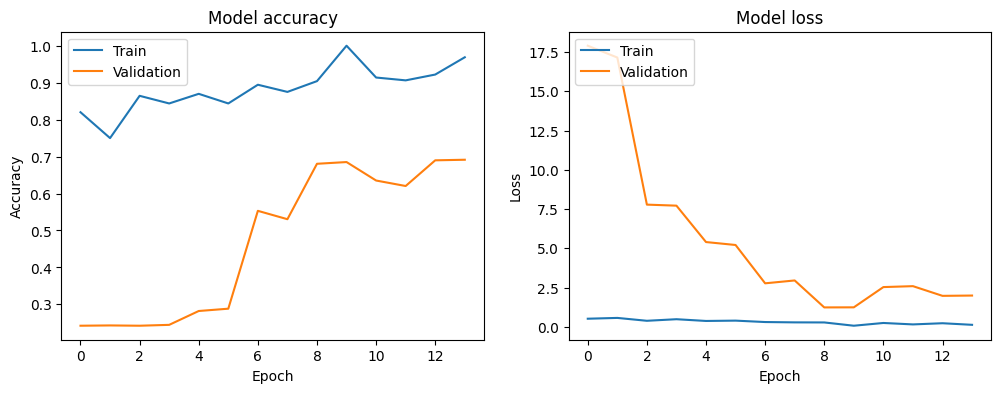

In [11]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [12]:
val_data = val_datagen.flow_from_directory(
    data_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    subset='validation',
    shuffle=False  # Important for making predictions
)

y_pred_prob = model.predict(val_data)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = val_data.classes


Found 1289 images belonging to 4 classes.
41/41 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
target_names = list(val_data.class_indices.keys())
print(classification_report(y_true, y_pred, target_names=target_names))


              precision    recall  f1-score   support

  Brown rust       0.57      0.82      0.67       312
     Healthy       0.74      0.84      0.79       397
  Loose Smut       0.93      0.59      0.72       232
 Yellow rust       0.61      0.43      0.50       348

    accuracy                           0.68      1289
   macro avg       0.71      0.67      0.67      1289
weighted avg       0.70      0.68      0.67      1289



In [15]:
# Generate the confusion matrix
cm = confusion_matrix(y_true, y_pred)
# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[255  20   0  37]
 [ 23 334   4  36]
 [ 55  17 136  24]
 [112  79   7 150]]


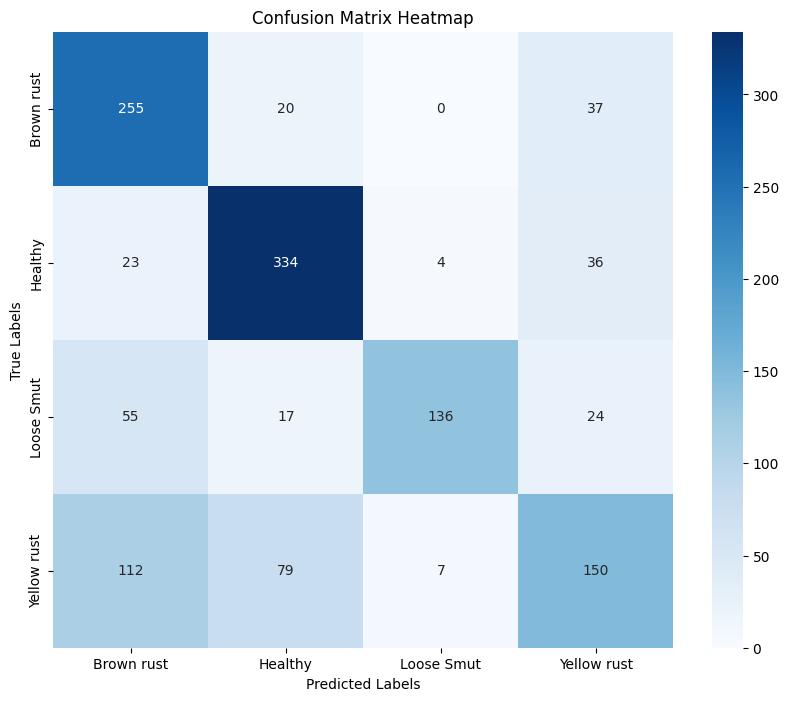

In [16]:
# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [17]:
class_map = train_data.class_indices
classes = []
for key in class_map.keys():
   classes.append(key)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_image(filename, model, image_size=(150, 150)):
    img = load_img(filename, target_size=image_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.  # Normalize the image data
    prediction = model.predict(img_array)
    index = np.argmax(prediction)
    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step


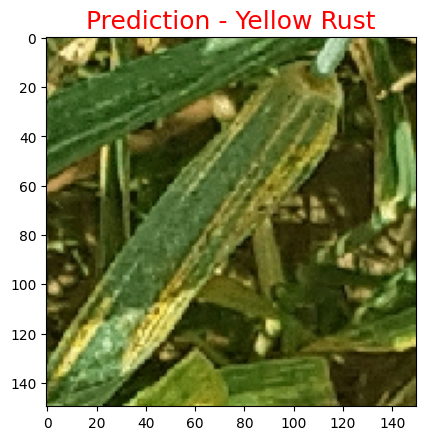

In [19]:
predict_image("P:\Wheat Disease Classification\Dataset\Yellow rust\Yellow_rust047.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


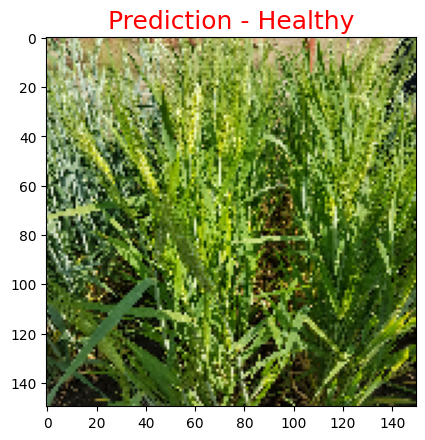

In [20]:
predict_image("P:\Wheat Disease Classification\Dataset\Healthy\AV7FQ8.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


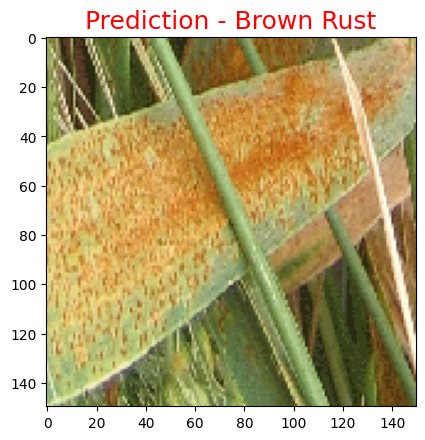

In [21]:
predict_image("P:\Wheat Disease Classification\Dataset\Brown rust\Brown_rust057.jpg", model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


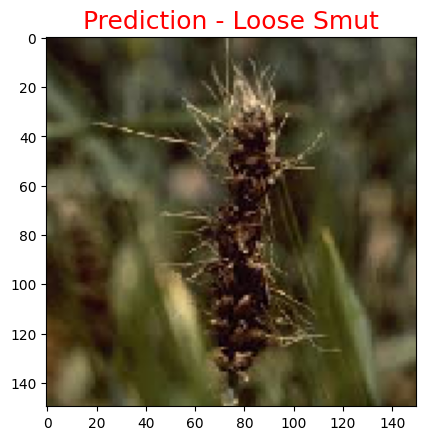

In [29]:
predict_image("P:\\Wheat Disease Classification\\Dataset\\Loose Smut\\1711.jpg", model)

In [30]:
# Save in H5 format (works in Keras 3)
model.save("wheat_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


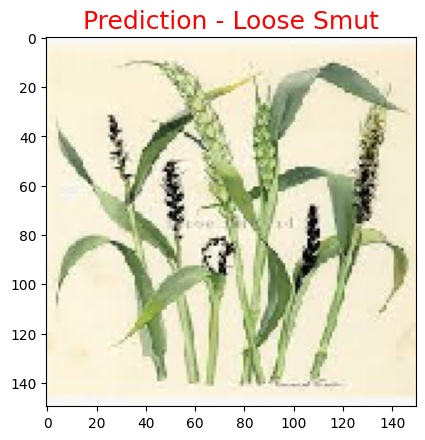

In [32]:
predict_image("P:\\Wheat Disease Classification\\Dataset\\Loose Smut\\0541.jpg", model)